In [1]:
import datetime
import pandas as pd
import numpy as np
import time as tm

time = datetime.date(2017,8,9)

print(time)
print(type(time))

time2 = tm.strptime("2017-08-08","%Y-%m-%d")
print(type(time2))
print(time2)
print(time2.tm_year)

print "{0} {1} 01".format('2018','02')

2017-08-09
<type 'datetime.date'>
<type 'time.struct_time'>
time.struct_time(tm_year=2017, tm_mon=8, tm_mday=8, tm_hour=0, tm_min=0, tm_sec=0, tm_wday=1, tm_yday=220, tm_isdst=-1)
2017
2018 02 01


In [2]:
import datetime
import pandas as pd
import numpy as np

%matplotlib inline

# Sales Data
all_data_file = "./data/train.csv"
data = pd.read_csv(all_data_file, dtype={"StateHoliday":np.str},
                  parse_dates=['Date'])
# Format Sales data
data.drop(['DayOfWeek'],axis = 1, inplace = True)
data.fillna('0')

data.head(2)

,Store,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,2015-07-31,5263,555,1,1,0,1
1,2,2015-07-31,6064,625,1,1,0,1


D:\DevTools\Anaconda3\envs\py2\lib\site-packages\IPython\html.py:14: ShimWarning: The `IPython.html` package has been deprecated since IPython 4.0. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


Index([u'Store', u'Date', u'Sales'], dtype='object')
            Store   Sales
Date                     
2013-01-31    2.0  115171
2013-02-28    2.0  111114


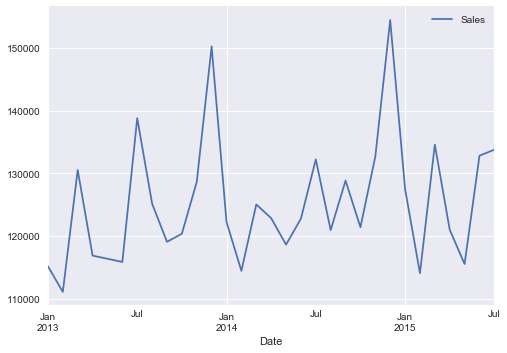

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

data.sort_values("Date", ascending= True)

def select_data(store_id):
    data2 = data[data.Store == store_id]
    #print(data2)
    simple_data = data2.drop(['Customers','Open','Promo','SchoolHoliday','StateHoliday'], axis =1)
    print(simple_data.columns)
    date_col = simple_data['Date']
    simple_data.index = date_col
    simple_data = simple_data.resample('M').sum() 
    #reset store id
    store_number = np.empty(len(simple_data['Sales']))
    store_number.fill(store_id)
    simple_data['Store'] = store_number
    return simple_data


simple_data = select_data(2)
print(simple_data.head(2))
simple_data.plot(kind='line',x=simple_data.index,y='Sales')


Index([u'Store', u'Date', u'Sales'], dtype='object')
Index([u'Store', u'Date', u'Sales'], dtype='object')


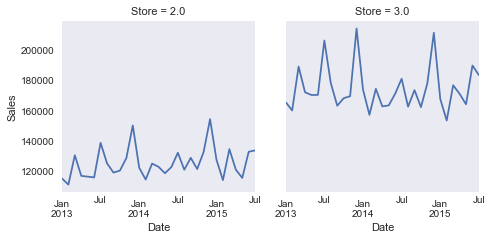

In [4]:
plot_datas = pd.DataFrame({'Sales':[],'Date':[]})
#plot_datas.index = plot_datas['Date']

simple_data_2 = select_data(2)
simple_data_2.reset_index(inplace = True)
#print(simple_data_2)

simple_data_3 = select_data(3)
simple_data_3.reset_index(inplace = True)
#print(simple_data_3)

plot_datas = plot_datas.append(simple_data_2)
plot_datas = plot_datas.append(simple_data_3)

#print(plot_datas)

plot_datas.sort_values("Date", ascending= True,inplace= True)
#print(plot_datas)


def dateplot(x, y, **kwargs):
    ax = plt.gca()
    data = kwargs.pop("data")
    data.plot(x=x, y=y, ax=ax, grid=False, **kwargs)
    
g = sns.FacetGrid(plot_datas, col="Store", col_wrap=2, size=3.5)
g = g.map_dataframe(dateplot, "Date", "Sales")

def temp():
    simple_data_expend = simple_data.reset_index()
    store_number = np.empty(len(simple_data_expend['Date']))
    store_number.fill(np.int(3.9))
    print(type(store_number[1]))
    simple_data_expend['Store'] = store_number
    plot_datas = plot_datas.append(simple_data_expend)
    print(plot_datas)

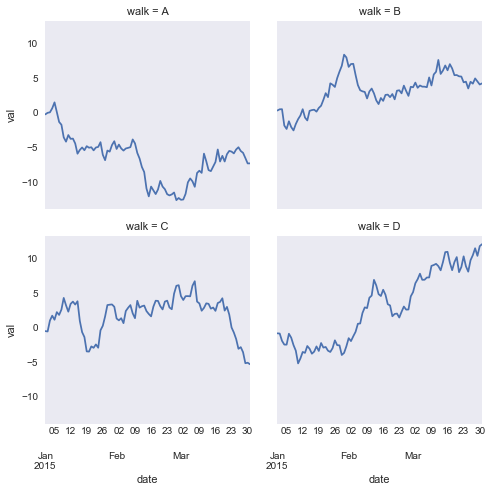

In [5]:
import pandas as pd
df = pd.DataFrame(
    data=np.random.randn(90, 4),
    columns=pd.Series(['A','B','C','D'], name="walk"),
    index=pd.date_range("2015-01-01", "2015-03-31",
      name="date"))
df = df.cumsum(axis=0).stack().reset_index(name="val")
#print(df)
def dateplot(x, y, **kwargs):
    ax = plt.gca()
    data = kwargs.pop("data")
    data.plot(x=x, y=y, ax=ax, grid=False, **kwargs)
g = sns.FacetGrid(df, col="walk", col_wrap=2, size=3.5)
g = g.map_dataframe(dateplot, "date", "val")

## Grouping

In [6]:
# Sales Data
store_data = "./data/store.csv"
store = pd.read_csv(store_data)
store.fillna('0')

print store.head(2)

def find_store_info(store_id):
    store_info = store.loc[store['Store'] == store_id]
    return store_info.iloc[0,1],store_info.iloc[0,2]
    
print type(find_store_info(2))
a,b = find_store_info(1)
print a
print b

   Store StoreType Assortment  CompetitionDistance  CompetitionOpenSinceMonth  \
0      1         c          a               1270.0                        9.0   
1      2         a          a                570.0                       11.0   

   CompetitionOpenSinceYear  Promo2  Promo2SinceWeek  Promo2SinceYear  \
0                    2008.0       0              NaN              NaN   
1                    2007.0       1             13.0           2010.0   

     PromoInterval  
0              NaN  
1  Jan,Apr,Jul,Oct  
<type 'tuple'>
c
a


In [7]:
data['StoreType'] = np.empty(len(data['Sales']))
data['Assortment'] = np.empty(len(data['Sales']))
data['CD'] = np.empty(len(data['Sales']))

print data.head(2)

def set_cd(store_id):
    return 999

for index, row in data.iterrows():
    store_id = data.iloc[index,0]
    data.iloc[index,10] = set_cd(store_id)
    st,am = find_store_info(store_id)
    data.iloc[index,8] = st
    data.iloc[index,9] = am
    
print data.head(2)

   Store       Date  Sales  Customers  Open  Promo StateHoliday  \
0      1 2015-07-31   5263        555     1      1            0   
1      2 2015-07-31   6064        625     1      1            0   

   SchoolHoliday  StoreType  Assortment   CD  
0              1        0.0         0.0  0.0  
1              1        0.0         0.0  0.0  
   Store       Date  Sales  Customers  Open  Promo StateHoliday  \
0      1 2015-07-31   5263        555     1      1            0   
1      2 2015-07-31   6064        625     1      1            0   

   SchoolHoliday StoreType Assortment     CD  
0              1         c          a  999.0  
1              1         a          a  999.0  
